In [ ]:
# do something like this - copy over from fastai2 walkthru 
# !nvidia-smi -L

In [ ]:
# make your Google drive accessible 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai2_library/course-v4/'

# navigate to the notebooks directory for dl2
import os
os.chdir(base_dir)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!pwd
# cd to base_dir if above os.chdir does not work using below command
# %cd "/content/gdrive/My Drive/fastai/course-v4/"

/content/gdrive/My Drive/fastai2_library/course-v4


In [ ]:
!pip install -q -r requirements.txt

     |████████████████████████████████| 184kB 2.7MB/s 
     |████████████████████████████████| 61kB 4.1MB/s 
     |████████████████████████████████| 51kB 3.7MB/s 
     |████████████████████████████████| 1.1MB 8.9MB/s 
     |████████████████████████████████| 40kB 3.4MB/s 
     |████████████████████████████████| 92kB 5.0MB/s 
     |████████████████████████████████| 61kB 5.5MB/s 
     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 2.6MB 17.4MB/s 


In [ ]:
%cd nbs

/content/gdrive/My Drive/fastai2_library/course-v4/nbs


In [ ]:
#default_exp transform

In [ ]:
#export
from fastcore.imports import *
from fastcore.foundation import *
from fastcore.utils import *
from fastcore.dispatch import *

In [ ]:
from PIL import Image
import torch
# from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
from fastai2.vision.all import *

Jeremy examples from WT video:

In [ ]:
# below ... same as pass in Python

class Foo: ...

In [ ]:
# Created class Foo
Foo

__main__.Foo

In [ ]:
# Above way to define class is syntax sugar for 
# type(object_or_name, bases, dict) and passing in 3 things - name of class, bases = classes this class inherits from, a dictionary

# Let us define a Foo2 class, the base class you inherit from is object - pass it in as a singleton tuple, then empty dict 
Foo2 = type('Foo2', (object,), {})

In [ ]:
# Compare the two - they are similar things
Foo, Foo2

(__main__.Foo, __main__.Foo2)

In [ ]:
type(Foo)

type

In [ ]:
# What is type of type?
type(type)

type

In [ ]:
# So type is a Class and also 
# type is a Constructor which constructs things of type type for eg Foo2 is of type type
# when we say Foo2 = type('Foo2', (Object,), {}) 

# Foo2 has many attributes
Foo2._

In [ ]:
# Arguably most important attribute is 
Foo2.__dict__
# which is a somewhat special kind of dictionary

mappingproxy({'__dict__': <attribute '__dict__' of 'Foo2' objects>,
              '__doc__': None,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'Foo2' objects>})

In [ ]:
# We could do this to set an attribute in Foo2
Foo2 = type('Foo2', (object,), {'a': 1})

In [ ]:
# Let us look at Foo2.__dict__
Foo2.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'Foo2' objects>,
              '__doc__': None,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'Foo2' objects>,
              'a': 1})

In [ ]:
# Interestingly we get syntax sugar for doing the above in Python
class Foo2:
  a = 1

In [ ]:
# Now let us look at the __dict__
Foo2.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'Foo2' objects>,
              '__doc__': None,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'Foo2' objects>,
              'a': 1})

In [ ]:
# So sayin a = 1 in cell above withing Foo2 class is 
# creating a attribute in the __dict__ attribute of the Foo2 class

In [ ]:
# How we normally access attribute a is also syntax sugar
Foo2.a

1

In [ ]:
# Above is syntax sugar for....
Foo2.__dict__['a']

1

Why is all this relevant? Coz when we define a MetaClass we are going to replace type. So we want to use some other constructor than type constructor to construct our class(es). How do you do that in Python?

In [ ]:
# You do the following - you say metaclass = and provide the name of the class you want to construct your class
# IN this example MyClass is the class being constructed using the metaclass _TfmMeta

# class MyClass(metaclass=_TfmMeta)

You could create the class \_M (example below) or \_TfmMeta in our actual usage from scratch BUT normally we don't. We inherit from the type constructor and change what we need to change i.e., easiest to subclass type.

Recall that type takes 3 things as input: name, bases, dict to make a class.

(BTW - so a Metaclass creates a class, whereas a class creates instances).

Let us create a supersimple MetaClass \_M

In [ ]:
class _M(type):
  def __new__(cls, name, bases, dict):
    return super().__new__(cls, name, bases, dict)

In [ ]:
# This class _M does not change anything at all but it works
# Now we create a class using the _M metaclass instead of type

# Once we start changing code in our Metaclass _M though we can start 
# changing the behavior of type creation.

# What we are eventually after is that we want any class inheriting
# from the Transform class to have a different class behavior. That can
# only be achieved with the use of a metaclass. For eg, two different
# encodes for two different data input types.

class T(metaclass=_M): pass

In [ ]:
T

__main__.T

In [ ]:
T.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'T' objects>,
              '__doc__': None,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'T' objects>})

In [ ]:
# Can start putting things in Metaclass to see what happens
class _M(type):
  def __new__(cls, name, bases, dict):
    print("I print this when I am defined so __new__ run when class defined")
    return super().__new__(cls, name, bases, dict)

In [ ]:
class T(metaclass=_M): pass

I print this when I am defined so __new__ run when class defined


Above is interesting because the printing happened as soon as we created an object of type T. The printing occured as soon as we created the class T. So Python runs \_\_new__ anytime we create a class. We do NOT need to instantiate the class.

So if we look at _TfmMeta class below that we define:

We are replacing 3 things:

  \_\_new__

  \_\_call__ 

  \_\_prepare__

  This link is useful: https://docs.python.org/3/reference/datamodel.html

  More specifically: https://docs.python.org/3/reference/datamodel.html#customizing-class-creation

Even more: https://docs.python.org/3/library/functions.html#type

If we look at Metaclasses - we need to prepare namespace of the class which is the \_\_dict__ object 

For eg if we continue the _M example above

Namespace reference links:

https://www.python-course.eu/python3_namespaces.php

https://realpython.com/python-namespaces-scope/

https://www.techbeamers.com/python-namespace-scope/

https://medium.com/better-programming/namespacing-with-python-79574d125564


Metaclass reference links:

Text links: 

https://www.python-course.eu/python3_road_to_metaclasses.php

https://jakevdp.github.io/blog/2012/12/01/a-primer-on-python-metaclasses/

https://realpython.com/python-metaclasses/

https://blog.ionelmc.ro/2015/02/09/understanding-python-metaclasses/#id25

Video links:

https://www.youtube.com/watch?v=sPiWg5jSoZI 

http://dabeaz.com/py3meta/

https://www.youtube.com/watch?v=7PzeZQGVPKc&list=PLLj6w0Thbv00Ij2yYC5PJOUaD_xuQcm7O&index=33&t=14s

Some related but not directly relevant links:

https://stackoverflow.com/questions/50296097/how-to-initialize-a-simplenamespace-from-a-dict

https://stackoverflow.com/questions/54395313/new-and-init-on-class-and-object/54395476#54395476

https://stackoverflow.com/questions/14361256/whats-the-biggest-difference-between-dir-and-dict-in-python

In [ ]:
class _M(type):
  def __new__(cls, name, bases, dict):
    print("I print this when I am defined so __new__ run when class defined")
    return super().__new__(cls, name, bases, dict)

  @classmethod
  # return empty dict as class namespace
  def __prepare__(cls, name, bases): return {}

In [ ]:
class T(metaclass=_M): pass

I print this when I am defined so __new__ run when class defined


In [ ]:
# Everything works as before
T.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'T' objects>,
              '__doc__': None,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'T' objects>})

In [ ]:
# We can even put something in the class namespace when it is created
# by putting it in the dict returned in __prepare__
class _M(type):
  def __new__(cls, name, bases, dict):
    print("I print this when I am defined so __new__ run when class defined")
    return super().__new__(cls, name, bases, dict)

  @classmethod
  # return empty dict as class namespace
  def __prepare__(cls, name, bases): return {'a':1}

In [ ]:
class T(metaclass=_M): pass

I print this when I am defined so __new__ run when class defined


In [ ]:
# Everything works as before and see new value
T.__dict__

mappingproxy({'__dict__': <attribute '__dict__' of 'T' objects>,
              '__doc__': None,
              '__module__': '__main__',
              '__weakref__': <attribute '__weakref__' of 'T' objects>,
              'a': 1})

This is a way you can insert something into every single class which has a Metaclass _M for example.

In [ ]:
# Returning to look at _TfmMeta(type) -> we are not returning an ordinary dict 
# BUT INSTEAD __prepare__ is returning a special type of dict called _TfmDict()
# What is a _TfmDict?

See _TfmDict code below: Behaves like a normal dict with modifications below for anything that uses the metaclass _TfmMeta and it does nothing different than a standard dict EXCEPT FOR three special things called "encodes", "decodes", "setup". 

In those cases it is going to use something called TypeDispatch.

# Transforms

> Definition of `Transform` and `Pipeline`

The classes here provide functionality for creating a composition of *partially reversible functions*. By "partially reversible" we mean that a transform can be `decode`d, creating a form suitable for display. This is not necessarily identical to the original form (e.g. a transform that changes a byte tensor to a float tensor does not recreate a byte tensor when decoded, since that may lose precision, and a float tensor can be displayed already).

Classes are also provided and for composing transforms, and mapping them over collections. `Pipeline` is a transform which composes several `Transform`, knowing how to decode them or show an encoded item.

## Transform -

In [ ]:
#export
_tfm_methods = 'encodes','decodes','setups'

class _TfmDict(dict):
    # overrides __setitem__ of ordinary dict
    # If you are not calling encodes, decodes, or setups or values not a callable (i.e., a function)
    # it is just a normal dictionary
    def __setitem__(self,k,v):
        if k not in _tfm_methods or not callable(v): return super().__setitem__(k,v)
        # if encodes or decodes or .....
        # check whether or not I already have encodes, decodes, setup in my class
        # if NOT then I create one using dict's setitem and I set it to a 
        # TypeDispatch object. 
        if k not in self: super().__setitem__(k,TypeDispatch())
        # self[k] is TypeDispatch object
        # The add is a method of TypeDispatch class 
        self[k].add(v)

In [ ]:
#export
class _TfmMeta(type):
    def __new__(cls, name, bases, dict):
        # First gets called when you are creating a new type
        # Customizing __new__ and inheriting from a BaseClass
        # causes 
        res = super().__new__(cls, name, bases, dict)
        # for encodes, decodes, setups if you need to walk
        # the class hierarchy ??
        for nm in _tfm_methods:
            base_td = [getattr(b,nm,None) for b in bases]
            if nm in res.__dict__: getattr(res,nm).bases = base_td
            else: setattr(res, nm, TypeDispatch(bases=base_td))
        # replace signature of this class with signature of __init__
        # to get a nice signature instead of *args, **kwargs.
        res.__signature__ = inspect.signature(res.__init__)
        return res

    def __call__(cls, *args, **kwargs):
        # We are redefining what happens when we instantiate
        # this class differently than __call__ in type does
        # If we instantiate a transform class or __call__ this class
        # and pass in some arguments and if that argument
        # is callable and its name attr is 'encodes', 'decodes', 'setups' THEN
        # we add that function to our TypeDispatch object and return the function

        # So @A then def encodes(self, x): 
        # it adds that function to the class' TypeDispatch object

        # So the add below is the TypeDispatch add method which registers
        # another type and returns the corresponding function
        # If not one of those 3 then just return the function.
        f = args[0] if args else None
        n = getattr(f,'__name__',None)
        if callable(f) and n in _tfm_methods:
            getattr(cls,n).add(f)
            return f
        return super().__call__(*args, **kwargs)

    @classmethod
    def __prepare__(cls, name, bases): return _TfmDict()

In [ ]:
##export
def _get_name(o):
    if hasattr(o,'__qualname__'): return o.__qualname__
    if hasattr(o,'__name__'): return o.__name__
    return o.__class__.__name__

In [ ]:
#export
def _is_tuple(o): return isinstance(o, tuple) and not hasattr(o, '_fields')

In [ ]:
#export
class Transform(metaclass=_TfmMeta):
    "Delegates (`__call__`,`decode`,`setup`) to (`encodes`,`decodes`,`setups`) if `split_idx` matches"
    split_idx,init_enc,order,train_setup = None,None,0,None
    def __init__(self, enc=None, dec=None, split_idx=None, order=None):
        self.split_idx = ifnone(split_idx, self.split_idx)
        if order is not None: self.order=order
        self.init_enc = enc or dec
        # if no value passed in then use some pre-defined values
        # if value passed in do the rest
        if not self.init_enc: return

        self.encodes,self.decodes,self.setups = TypeDispatch(),TypeDispatch(),TypeDispatch()
        if enc:
            self.encodes.add(enc)
            self.order = getattr(enc,'order',self.order)
            if len(type_hints(enc)) > 0: self.input_types = first(type_hints(enc).values())
            self._name = _get_name(enc)
        if dec: self.decodes.add(dec)

    @property
    def name(self): return getattr(self, '_name', _get_name(self))
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
    def decode  (self, x, **kwargs): return self._call('decodes', x, **kwargs)
    def __repr__(self): return f'{self.name}: {self.encodes} {self.decodes}'

    def setup(self, items=None, train_setup=False):
        train_setup = train_setup if self.train_setup is None else self.train_setup
        return self.setups(getattr(items, 'train', items) if train_setup else items)
    
    def _call(self, fn, x, split_idx=None, **kwargs):
        # This split_idx is related to training set, validation set 
        if split_idx!=self.split_idx and self.split_idx is not None: return x
        return self._do_call(getattr(self, fn), x, **kwargs)

    def _do_call(self, f, x, **kwargs):
        # handle the not a tuple case; there is no longer as_item
        # f is function decodes or encodes
        if not _is_tuple(x):
            return x if f is None else retain_type(f(x, **kwargs), x, f.returns_none(x))
        # if a tuple call self._do_call for each x_ in x and make the res a tuple
        # don't forget to retain type of res
        res = tuple(self._do_call(f, x_, **kwargs) for x_ in x)
        return retain_type(res, x)

add_docs(Transform, decode="Delegate to `decodes` to undo transform", setup="Delegate to `setups` to set up transform")

What are encodes and decodes in Transform and what cool things can we do with them:
- pass methods in
- subclass
- multiple encodes/decodes each with different type annotation
- using a decorator or decorator behavior

In [ ]:
# Explanation Examples of _TfmDict
#
class A(metaclass=_TfmMeta):
  def encodes(self, x): return x


In [ ]:
# This is not a normal function
A.encodes

(object,object) -> encodes

In [ ]:
# What type is it?
type(A.encodes)

fastcore.dispatch.TypeDispatch

So by using metaclass \_TfmMeta and by providing a \_TfmDict through \_\_prepare\_\_ we call \_\_setitem\_\_ with the key encodes when we see multiple encodes and the value of the function (v) and we can do with that what we like. 

What we actually do is we create an encodes, decodes, setups type dispatch object if we do not already have one (see code in _TfmDict) and we add this function to the TypeDispatch object.


In [ ]:
class A(metaclass=_TfmMeta):
  def encodes(self,x:Int):   return x
  def encodes(self,x:float): return x

In [ ]:
A.encodes

(float,object) -> encodes
(Int,object) -> encodes

Now - Let us look at TypeDispatch which is a nb of its own 03_dispatch.ipynb. 
How do you make Python do what we want it to do using the Data Model. Go to TypeDispatch notebook

So now that we understand working of TypeDispatch:
  we have replaced the normal dict of a class namespace for the Transform class by using \_\_prepare\_\_ with \_TfmDict
  When you set the item as encodes, decodes or setups, \_TfmDict actually creates a TypeDispatch object and adds to it. 

That means now when we inherit from Transform and we create an encodes, decodes or setups attribute, it will actually add it to the encodes or decodes type dispatch and so when we call encodes or decodes we get this behavior which is to dispatch on type. This is single dispatch not multiple dispatch so will only do type dispatch based on the first non self parameter obtained through _p2_anno as we saw in TypeDispatch nb. So if you do NOT provide a type for a Transform - the Transform will do nothing - ie will return the input as output.



In [ ]:
'''
Signature: retain_type(new, old=None, typ=None, copy_meta=False)
Source:   
def retain_type(new, old=None, typ=None, copy_meta=False):
    "Cast `new` to type of `old` or `typ` if it's a superclass"
    # e.g. old is TensorImage, new is Tensor - if not subclass then do nothing
    if new is None: return
    assert old is not None or typ is not None
    if typ is None:
        if not isinstance(old, type(new)): return new
        typ = old if isinstance(old,type) else type(old)
    # Do nothing the new type is already an instance of requested type (i.e. same type)
    if typ==NoneType or isinstance(new, typ): return new
    return retain_meta(old, cast(new, typ), copy_meta=copy_meta)
File:      /usr/local/lib/python3.6/dist-packages/fastcore/dispatch.py
'''
retain_type??

In [ ]:
'''
Signature: retain_types(new, old=None, typs=None)
Source:   
def retain_types(new, old=None, typs=None):
    "Cast each item of `new` to type of matching item in `old` if it's a superclass"
    if not is_listy(new): return retain_type(new, old, typs)
    if typs is not None:
        if isinstance(typs, dict):
            t = first(typs.keys())
            typs = typs[t]
        else: t,typs = typs,None
    else: t = type(old) if old is not None and isinstance(old,type(new)) else type(new)
    return t(L(new, old, typs).map_zip(retain_types, cycled=True))
File:      /usr/local/lib/python3.6/dist-packages/fastcore/dispatch.py
'''

retain_types??

In [ ]:
# show_doc(Transform)

A `Transform` is the main building block of the fastai data pipelines. In the most general terms a transform can be any function you want to apply to your data, however the `Transform` class provides several mechanisms that make the process of building them easy and flexible.

### The main `Transform` features:

- **Type dispatch** - Type annotations are used to determine if a transform should be applied to the given argument. It also gives an option to provide several implementations and it choses the one to run based on the type. This is useful for example when running both independent and dependent variables through the pipeline where some transforms only make sense for one and not the other. Another usecase is designing a transform that handles different data formats. Note that if a transform takes multiple arguments only the type of the first one is used for dispatch. 
- **Handling of tuples** - When a tuple (or a subclass of tuple) of data is passed to a transform it will get applied to each element separately. You can opt out of this behavior by passing a list or an `L`, as only tuples gets this specific behavior. An alternative is to use `ItemTransform` defined below, which will always take the input as a whole.
- **Reversability** - A transform can be made reversible by implementing the `decodes` method. This is mainly used to turn something like a category which is encoded as a number back into a label understandable by humans for showing purposes. Like the regular call method, the `decode` method that is used to decode will be applied over each element of a tuple separately.
- **Type propagation** - Whenever possible a transform tries to return data of the same type it received. Mainly used to maintain semantics of things like `ArrayImage` which is a thin wrapper of pytorches `Tensor`. You can opt out of this behavior by adding `->None` return type annotation.
- **Preprocessing** - The `setup` method can be used to perform any one-time calculations to be later used by the transform, for example generating a vocabulary to encode categorical data.
- **Filtering based on the dataset type** - By setting the `split_idx` flag you can make the transform be used only in a specific `DataSource` subset like in training, but not validation.
- **Ordering** - You can set the `order` attribute which the `Pipeline` uses when it needs to merge two lists of transforms.
- **Appending new behavior with decorators** - You can easily extend an existing `Transform` by creating `encodes` or `decodes` methods for new data types. You can put those new methods outside the original transform definition and decorate them with the class you wish them patched into. This can be used by the fastai library users to add their own behavior, or multiple modules contributing to the same transform.

### Defining a `Transform`
There are a few ways to create a transform with different ratios of simplicity to flexibility.
- **Extending the `Transform` class** - Use inheritence to implement the methods you want.
- **Passing methods to the constructor** - Instantiate the `Transform` class and pass your functions as `enc` and `dec` arguments.
- **@Transform decorator** - Turn any function into a `Transform` by just adding a decorator - very straightforward if all you need is a single `encodes` implementation.
- **Passing a function to fastai APIs** - Same as above, but when passing a function to other transform aware classes like `Pipeline` or `TfmdDS` you don't even need a decorator. Your function will get converted to a `Transform` automatically.

### IGNORE UNTIL WE GO THROUGH METACLASS AND COME BACK TO THIS PART
How can we use a subclass of a Transform as a decorator?

The decorator will call this as a callable and pass the function to it.
So if A is subclass of Transform:

class A(Transform): pass 

@A
def encodes(self, x): return x+1

is identical to saying 

def _encodes(x): return x+1;
A = A(_encodes)


### IGNORE UNTIL WE GO THROUGH METACLASS AND COME BACK TO THIS PART
A class is normally callable. When we instantiate a class like so
class B: pass
b = B() 
then we are are actually executing call in B's metaclass.

So  let us look at \_TfmMeta \_\_call\_\_

## EXAMPLES OF TRANSFORMs

In [ ]:
class A(Transform): pass
@A
def encodes(self, x): return x+1
f1 = A()
test_eq(f1(1), 2)

class B(A): pass
@B
def decodes(self, x): return x-1
f2 = B()
# Note that below is coz B inherits from A and so 
# has encodes as x+1 and decodes as x-1
# But A does NOT have a decodes so f1.decode does nothing
test_eq(f2(1), 2)
test_eq(f2.decode(2), 1)
test_eq(f1.decode(2), 2)

class A(Transform): pass
f3 = A()
test_eq_type(f3(2), 2)
test_eq_type(f3.decode(2.0), 2.0)

`Transform` can be used as a decorator, to turn a function into a `Transform`.

In [ ]:
f = Transform(lambda o:o//2)

In [ ]:
test_eq_type(f(2), 1)
test_eq_type(f.decode(2.0), 2.0)

In [ ]:
@Transform
def f(x): return x//2
test_eq_type(f(2), 1)
test_eq_type(f.decode(2.0), 2.0)

@Transform
def f(x): return x*2
test_eq_type(f(2), 4)
test_eq_type(f.decode(2.0), 2.0)

You can derive from `Transform` and use `encodes` for your encoding function.

In [ ]:
'''
Type:        str
String form: images/puppy.jpg
Length:      16
'''
TEST_IMAGE??

In [ ]:
'''
Type:        str
String form: images/mnist3.png
Length:      17
'''
TEST_IMAGE_BW??

In [ ]:
source = untar_data(URLs.PETS)/"images"
items = get_image_files(source)
items

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_49.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_129.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_166.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_92.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_120.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_78.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_103.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_56.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Birman_13.jpg')...]

In [ ]:
my_test_img = items[0]

In [ ]:
class ArrayImage(ndarray):
    _show_args = {'cmap':'viridis'}
    def __new__(cls, x, *args, **kwargs):
        if isinstance(x,tuple): super().__new__(cls, x, *args, **kwargs)
        if args or kwargs: raise RuntimeError('Unknown array init args')
        if not isinstance(x,ndarray): x = array(x)
        return x.view(cls)
    
    def show(self, ctx=None, figsize=None, **kwargs):
        if ctx is None: _,ctx = plt.subplots(figsize=figsize)
        ctx.imshow(im, **{**self._show_args, **kwargs})
        ctx.axis('off')
        return ctx
    
#im = Image.open(TEST_IMAGE)
im = Image.open(my_test_img)
im_t = ArrayImage(im)

In [ ]:
class A(Transform):
    def encodes(self, x:ArrayImage): return -x
    def decodes(self, x:ArrayImage): return x+1
    def setups (self, x:ArrayImage): x.foo = 'a'
f = A()
t = f(im_t)
# check that encodes of transform A works
test_eq(t, -im_t)
# check that encodes works on value 1 ie it does nothing coz type does NOT match
test_eq(f(1), 1)
# check that type of t is ArrayImage ie return -x in encodes does NOT change type x:ArrayImage that is passed in
test_eq(type(t), ArrayImage)
# check that decodes of Transform works since type of t is ArrayImage
test_eq(f.decode(t), -im_t+1)
# Check that decodes does nothing if type not a match
test_eq(f.decode(1), 1)
# if setup called then ensure setups method is run
f.setup(im_t)
test_eq(im_t.foo, 'a')
# check that setup does not work if data type is not a match
t2 = array(1)
f.setup(t2)
assert not hasattr(f2,'foo')
f

A: (ArrayImage,object) -> encodes
 (ArrayImage,object) -> decodes

Without return annotation we get an `Int` back since that's what was passed.

In [ ]:
class A(Transform): pass
@A
def encodes(self, x:Int): return x//2
@A
def encodes(self, x:float): return x+1

f = A()
# Int passed Int returned
test_eq_type(f(Int(2)), Int(1))
# normal int passed, not of type Int or Float so nothing happens
test_eq_type(f(2), 2)
# float passed so x+1 occurs
test_eq_type(f(2.), 3.)

Without return annotation we don't cast if we're not a subclass of the input type. If the annotation is a tuple, then any type in the tuple will match.

In [ ]:
class A(Transform):
    def encodes(self, x:(Int,float)): return x/2
    def encodes(self, x:(str,list)): return str(x)+'1'

f = A()
# Int passed so x/2 returned
test_eq_type(f(Int(2)), 1.)
# 2 is neither type Int or Float so nothing happens
test_eq_type(f(2), 2)
# Float so /2
test_eq_type(f(Float(2.)), Float(1.))
# String so +'1'
test_eq_type(f('a'), 'a1')
# list
test_eq_type(f([1]), '[1]1')

With return annotation `None` we get back whatever Python creates usually.

In [ ]:
def func(x)->None: return x/2.
f = Transform(func)
test_eq_type(f(2), 1.)
test_eq_type(f(2.), 1.)

Since `decodes` has no return annotation, but `encodes` created an `Int` and we pass that result here to `decode`, we end up with an `Int`.

In [ ]:
def func(x): return Int(x+1)
def dec (x): return x-1
# Here dec is decode method of Transform passed in as dec argument
f = Transform(func,dec)
t = f(1)
test_eq_type(t, Int(2))
test_eq_type(f.decode(t), Int(1))

If the transform has `split_idx` then it's only applied if `split_idx` param matches.

In [ ]:
f

func: (object,object) -> func (object,object) -> dec

In [ ]:
f(1)

2

In [ ]:
f.split_idx = 1
test_eq(f(1, split_idx=1), Int(2))
test_eq_type(f(1, split_idx=0), 1)

Transform takes lists as a whole and is applied to them.

In [ ]:
class A(Transform): 
    def encodes(self, xy): x,y=xy; return [x+y,y]
    def decodes(self, xy): x,y=xy; return [x-y,y]

f = A()
t = f([1,2])
# Check that below is encodes in A
test_eq(t, [3,2])
# Check that below is decodes in A
test_eq(f.decode(t), [1,2])
# Check that Transform works only when split_idx matches
f.split_idx = 1
test_eq(f([1,2], split_idx=1), [3,2])
test_eq(f([1,2], split_idx=0), [1,2])

In [ ]:
class AL(Transform): pass
@AL
def encodes(self, x): return L(x_+1 for x_ in x)
@AL
def decodes(self, x): return L(x_-1 for x_ in x)

f = AL()
t = f([1,2])
test_eq(t, [2,3])
test_eq(f.decode(t), [1,2])

Transforms are applied to each element of a tuple.

In [ ]:
def neg_int(x:numbers.Integral): return -x

f = Transform(neg_int)
test_eq(f((1,)), (-1,))
# float so nothing happens
test_eq(f((1.,)), (1.,))
test_eq(f((1.,2,3.)), (1.,-2,3.))
# decode is noop since nothing specified
test_eq(f.decode((1,2)), (1,2))

In [ ]:
#hide
test_eq(f.input_types, numbers.Integral)


Q: How do we create a Transform that transforms data in place 
We will return to this once we get a handle on the details of the Transform class

In [ ]:
#export
class InplaceTransform(Transform):
    "A `Transform` that modifies in-place and just returns whatever it's passed"
    def _call(self, fn, x, split_idx=None, **kwargs):
        super()._call(fn,x,split_idx,**kwargs)
        return x

In [ ]:
#hide
import pandas as pd

In [ ]:
# Define a InplaceTransform A
class A(InplaceTransform): pass
# Define its encodes funtion to only act on a series inplace and fill in nas with value = 10
@A
def encodes(self, x:pd.Series): x.fillna(10, inplace=True)
f = A()
# Check that data type is pandas Series and that na values are filled with 10
test_eq_type(f(pd.Series([1,2,None])),pd.Series([1,2,10]))

In [ ]:
class B(Transform): pass

@B
def encodes(self, x:int): return x+1
@B
def encodes(self, x:str): return x+'1'
@B
def encodes(self, x)->None: return str(x)+'!'

b = B()
# Here passed in type is list so returns str of list + '!'
test_eq(b([1]), '[1]!')
# passed in tuple so each elem of tuple so 2
test_eq(b((1,)), (2,))
# tuple of two values
test_eq(b((1, 2)), (2, 3))
# tuple single str elem
test_eq(b(('1',)), ('11',))
test_eq(b([1.0]), '[1.0]!')
# nothing on decode
test_eq(b.decode([2]), [2])
# think just shows that you can pickle a transform
assert pickle.loads(pickle.dumps(b))

In [ ]:
# Add decodes and check that it works for int, not for str
@B
def decodes(self, x:int): return x-1
test_eq(b.decode((2,)), (1,))
test_eq(b.decode(('2',)), ('2',))

Non-type-constrained functions are applied to all elements of a tuple.

In [ ]:
class A(Transform): pass

@A
def encodes(self, x): return x+1
@A
def decodes(self, x): return x-1

f = A()
t = f((1,2.0))
# Note that both int 1 and float 2 change with x+1 since type is not constrained 
# in the definition of Transform encodes or decodes
test_eq_type(t, (2,3.0))
test_eq_type(f.decode(t), (1,2.0))

Type-constrained functions are applied to only matching elements of a tuple, and return annotations are only applied where matching.

In [ ]:
class B(Transform):
    def encodes(self, x:int): return Int(x+1)
    def encodes(self, x:str): return x+'1'
    def decodes(self, x:Int): return x//2

f = B()
# Notice float, int, str types
start = (1.,2,'3')
t = f(start)
# Only works on int returns Int and str returns str
test_eq_type(t, (1.,Int(3),'31'))
# Only works on Int and returns input type
test_eq(f.decode(t), (1.,Int(1),'31'))

The dispatching over tuples works recursively, by the way:

In [ ]:
f = B()
# tuple within a tuple - works on all elems of tuples recursively
start = (1.,(2,'3'))
t = f(start)
test_eq_type(t, (1.,(Int(3),'31')))
test_eq(f.decode(t), (1.,(Int(1),'31')))

The same behavior also works with `typing` module type classes.

In [ ]:
class A(Transform): pass

@A
def encodes(self, x:numbers.Integral): return x+1
@A
def encodes(self, x:float): return x*3
@A
def decodes(self, x:int): return x-1

f = A()
start = 1.0
t = f(start)
test_eq(t, 3.)

# Here output should have nothing happen to it since type sent in is float
# and decode only works on int 
test_eq(f.decode(t), 3.)

start = (1.,2,3.)
t = f(start)
test_eq(t, (3.,3,9.))
test_eq(f.decode(t), (3.,2,9.))

#### ItemTransform

In [ ]:
#export
class ItemTransform(Transform):
    "A transform that always take tuples as items"
    _retain = True
    def __call__(self, x, **kwargs): return self._call1(x, '__call__', **kwargs)
    def decode(self, x, **kwargs):   return self._call1(x, 'decode', **kwargs)
    def _call1(self, x, name, **kwargs):
        if not _is_tuple(x): return getattr(super(), name)(x, **kwargs)
        y = getattr(super(), name)(list(x), **kwargs)
        if not self._retain: return y
        if is_listy(y) and not isinstance(y, tuple): y = tuple(y)
        return retain_type(y, x)

`ItemTransform` is the class to use to opt out of the default behavior of `Transform`.

In [ ]:
class AIT(ItemTransform): 
    def encodes(self, xy): x,y=xy; return (x+y,y)
    def decodes(self, xy): x,y=xy; return (x-y,y)
    
f = AIT()
test_eq(f((1,2)), (3,2))
test_eq(f.decode((3,2)), (1,2))

If you pass a special tuple subclass, the usual retain type behavior of `Transform` will keep it:

In [ ]:
class _T(tuple): pass
x = _T((1,2))
test_eq_type(f(x), _T((3,2)))

In [ ]:
#hide
f.split_idx = 0
# without split_idx match no encode executes
test_eq_type(f((1,2)), (1,2))
test_eq_type(f((1,2), split_idx=0), (3,2))
# without split_idx match no decode
test_eq_type(f.decode((1,2)), (1,2))
test_eq_type(f.decode((3,2), split_idx=0), (1,2))

In [ ]:
#hide
class Get(ItemTransform):
    _retain = False
    def encodes(self, x): return x[0]
    
g = Get()
test_eq(g([1,2,3]), 1)
test_eq(g(L(1,2,3)), 1)
test_eq(g(np.array([1,2,3])), 1)
test_eq_type(g((['a'], ['b', 'c'])), ['a'])

In [ ]:
#hide
class A(ItemTransform): 
    def encodes(self, x): return _T((x,x))
    def decodes(self, x): return _T(x)
    
f = A()
test_eq(type(f.decode((1,1))), _T)

In [ ]:
class A(Transform):
  def encodes(self, x): raise NotImplementedError
  def encodes (self, x:int): return x + 1

In [ ]:
a = A()

In [ ]:
a(1)

2

In [ ]:
a('hi')

NotImplementedError: ignored

### Func -

In [ ]:
#export
def get_func(t, name, *args, **kwargs):
    "Get the `t.name` (potentially partial-ized with `args` and `kwargs`) or `noop` if not defined"
    f = getattr(t, name, noop)
    return f if not (args or kwargs) else partial(f, *args, **kwargs)

This works for any kind of `t` supporting `getattr`, so a class or a module.

In [ ]:
test_eq(get_func(operator, 'neg', 2)(), -2)
test_eq(get_func(operator.neg, '__call__')(2), -2)
test_eq(get_func(list, 'foobar')([2]), [2])
t = get_func(torch, 'zeros', dtype=torch.int64)(5)
test_eq(t.dtype, torch.int64)
a = [2,1]
get_func(list, 'sort')(a)
test_eq(a, [1,2])

Transforms are built with multiple-dispatch: a given function can have several methods depending on the type of the object received. This is done directly with the `TypeDispatch` module and type-annotation in `Transform`, but you can also use the following class.

In [ ]:
#export
class Func():
    "Basic wrapper around a `name` with `args` and `kwargs` to call on a given type"
    def __init__(self, name, *args, **kwargs): self.name,self.args,self.kwargs = name,args,kwargs
    def __repr__(self): return f'sig: {self.name}({self.args}, {self.kwargs})'
    def _get(self, t): return get_func(t, self.name, *self.args, **self.kwargs)
    def __call__(self,t): return mapped(self._get, t)

You can call the `Func` object on any module name or type, even a list of types. It will return the corresponding function (with a default to `noop` if nothing is found) or list of functions.

In [ ]:
test_eq(Func('sqrt')(math), math.sqrt)
test_eq(Func('sqrt')(torch), torch.sqrt)

@patch
def powx(x:math, a): return math.pow(x,a)
@patch
def powx(x:torch, a): return torch.pow(x,a)
tst = Func('powx',a=2)([math, torch])
test_eq([f.func for f in tst], [math.powx, torch.powx])
for t in tst: test_eq(t.keywords, {'a': 2})

In [ ]:
#export
class _Sig():
    def __getattr__(self,k):
        def _inner(*args, **kwargs): return Func(k, *args, **kwargs)
        return _inner

Sig = _Sig()

In [ ]:
# show_doc(Sig, name="Sig")

`Sig` is just sugar-syntax to create a `Func` object more easily with the syntax `Sig.name(*args, **kwargs)`.

In [ ]:
f = Sig.sqrt()
test_eq(f(math), math.sqrt)
test_eq(f(torch), torch.sqrt)

## Pipeline -

In [ ]:
#export
# x is value to compose the tfms on and some list of tfms in tfms, 
# are we encoding (is_enc=True), or we going in forward or reverse order
# 
def compose_tfms(x, tfms, is_enc=True, reverse=False, **kwargs):
    "Apply all `func_nm` attribute of `tfms` on `x`, maybe in `reverse` order"
    if reverse: tfms = reversed(tfms)
    # classic function composition loop
    # go through each function f, you call it and replace current value with
    # result and repeat for each f in tfms.
    for f in tfms:
        if not is_enc: f = f.decode
        x = f(x, **kwargs)
    return x

In [ ]:
def to_int  (x):   return Int(x)
def to_float(x):   return Float(x)
def double  (x):   return x*2
# think None spec on output implies return type should be whatever python decides
# which for / is float.
def half(x)->None: return x/2

In [ ]:
def test_compose(a, b, *fs): test_eq_type(compose_tfms(a, tfms=map(Transform,fs)), b)

test_compose(1,   Int(1),   to_int)
test_compose(1,   Float(1), to_int,to_float)
test_compose(1,   Float(2), to_int,to_float,double)
test_compose(2.0, 2.0,      to_int,double,half)

In [ ]:
# SKR check
val1 = to_int(2.0)
print(val1)
print(type(val1))
# note here since no type specified on output
# output type is input type so int
val2 = double(val1)
print(val2)
print(type(val2)) # because no output type - so uses what python returns
val3 = half(val2)
print(val3)
print(type(val3))

2
<class 'fastcore.utils.Int'>
4
<class 'int'>
2.0
<class 'float'>


In [ ]:
class A(Transform):
    def encodes(self, x:float):  return Float(x+1)
    def decodes(self, x): return x-1
    
tfms = [A(), Transform(math.sqrt)]
t = compose_tfms(3., tfms=tfms)
test_eq_type(t, Float(2.))
# Here t is Float(2.) now passing in tfms and saying is_enc=False
# so the second fn has no decode so only A.decode which just does x-1 hence 1.
test_eq_type(compose_tfms(t, tfms=tfms, is_enc=False), Float(1.))
# Execute transforms here encodes but in reverse order so start with 4.
# then sqrt to 2. then add 1 so 3.
test_eq(compose_tfms(4., tfms=tfms, reverse=True), 3.)

In [ ]:
tfms = [A(), Transform(math.sqrt)]
# See if you can follow logic of why ans is correct
test_eq(compose_tfms((9,3.), tfms=tfms), (3,2.))

In [ ]:
#export
def mk_transform(f):
    "Convert function `f` to `Transform` if it isn't already one"
    f = instantiate(f)
    return f if isinstance(f,(Transform,Pipeline)) else Transform(f)

In [ ]:
#export
def gather_attrs(o, k, nm):
    "Used in __getattr__ to collect all attrs `k` from `self.{nm}`"
    if k.startswith('_') or k==nm: raise AttributeError(k)
    att = getattr(o,nm)
    res = [t for t in att.attrgot(k) if t is not None]
    if not res: raise AttributeError(k)
    return res[0] if len(res)==1 else L(res)

In [ ]:
#export
def gather_attr_names(o, nm):
    "Used in __dir__ to collect all attrs `k` from `self.{nm}`"
    return L(getattr(o,nm)).map(dir).concat().unique()

In [ ]:
#export
class Pipeline:
    "A pipeline of composed (for encode/decode) transforms, setup with types"
    def __init__(self, funcs=None, split_idx=None):
        self.split_idx,self.default = split_idx,None
        if isinstance(funcs, Pipeline): self.fs = funcs.fs
        else:
            if isinstance(funcs, Transform): funcs = [funcs]
            # List of transforms self.fs made into L then add noop if none.
            # make funcs transforms if they are not by the map call to mk_transform 
            # and sort them by order specified if they have an order
            self.fs = L(ifnone(funcs,[noop])).map(mk_transform).sorted(key='order')
        for f in self.fs:
            name = camel2snake(type(f).__name__)
            a = getattr(self,name,None)
            if a is not None: f = L(a)+f
            setattr(self, name, f)

    def setup(self, items=None, train_setup=False):
        tfms = self.fs[:]
        self.fs.clear()
        for t in tfms: self.add(t,items, train_setup)

    def add(self,t, items=None, train_setup=False):
        t.setup(items, train_setup)
        self.fs.append(t)

    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
    def __repr__(self): return f"Pipeline: {' -> '.join([f.name for f in self.fs if f.name != 'noop'])}"
    def __getitem__(self,i): return self.fs[i]
    def __setstate__(self,data): self.__dict__.update(data)
    def __getattr__(self,k): return gather_attrs(self, k, 'fs')
    def __dir__(self): return super().__dir__() + gather_attr_names(self, 'fs')

    def decode  (self, o, full=True):
        if full: return compose_tfms(o, tfms=self.fs, is_enc=False, reverse=True, split_idx=self.split_idx)
        # Not full means we decode up to the point the item knows how to show itself.
        for f in reversed(self.fs):
            # Try to show without decoding by using _is_showable
            # if not decode, 
            # go back and try again with previous function in pipeline
            # if it can show
            if self._is_showable(o): return o
            o = f.decode(o, split_idx=self.split_idx)
        return o

    def show(self, o, ctx=None, **kwargs):
        o = self.decode(o, full=False)
        o1 = (o,) if not _is_tuple(o) else o
        # handle non tuple case
        if hasattr(o, 'show'): ctx = o.show(ctx=ctx, **kwargs)
        # for tuple case check all o_ has show for plot and return plot
        else:
            for o_ in o1:
                if hasattr(o_, 'show'): ctx = o_.show(ctx=ctx, **kwargs)
        return ctx

    def _is_showable(self, o):
        if hasattr(o, 'show'): return True
        if _is_tuple(o): return all(hasattr(o_, 'show') for o_ in o)
        return False

In [ ]:
add_docs(Pipeline,
         __call__="Compose `__call__` of all `fs` on `o`",
         decode="Compose `decode` of all `fs` on `o`",
         show="Show `o`, a single item from a tuple, decoding as needed",
         add="Add transform `t`",
         setup="Call each tfm's `setup` in order")

`Pipeline` is a wrapper for `compose_tfms`. You can pass instances of `Transform` or regular functions in `funcs`, the `Pipeline` will wrap them all in `Transform` (and instantiate them if needed) during the initialization. 

It handles the transform `setup` by 

adding them one at a time and calling setup on each, 

goes through them in order in `__call__` or `decode` and 

can `show` an object by applying decoding the transforms up until the point it gets an object that knows how to show itself.

In [ ]:
# Empty pipeline is noop
pipe = Pipeline()
test_eq(pipe(1), 1)

In [ ]:
# Empty pipeline is noop
pipe = Pipeline()
test_eq(pipe(1), 1)
test_eq(pipe((1,)), (1,))
# Check pickle works
assert pickle.loads(pickle.dumps(pipe))

Int and Float are fastai versions of int and float which know how to show themselves. (Used in tests to make sure that retaining types work properly). 

In [ ]:
class IntFloatTfm(Transform):
    def encodes(self, x):  return Int(x)
    def decodes(self, x):  return Float(x)
    foo=1

int_tfm=IntFloatTfm()

def neg(x): return -x
neg_tfm = Transform(neg, neg)

In [ ]:
pipe = Pipeline([neg_tfm, int_tfm])

start = 2.0
t = pipe(start)
test_eq_type(t, Int(-2))
# Note t is Int(-2)
# Decode executes with int_tfm first so back to Float, 
# then neg_tfm decode so negate
test_eq_type(pipe.decode(t), Float(start))
# checks that first function when run prints second value to the screen
test_stdout(lambda:pipe.show(t), '-2')

In [ ]:
'''
Init signature: Int(*args, **kwargs)
Source:         class Int(int,ShowPrint): pass
File:           /usr/local/lib/python3.6/dist-packages/fastcore/utils.py
Type:           type
'''
Int??

In [ ]:
'''
Init signature: ShowPrint(*args, **kwargs)
Source:        
class ShowPrint:
    "Base class that prints for `show`"
    def show(self, *args, **kwargs): print(str(self))
File:           /usr/local/lib/python3.6/dist-packages/fastcore/utils.py
Type:           type
'''
ShowPrint??

In [ ]:
'''
Init signature: ShowTitle(*args, **kwargs)
Source:        
class ShowTitle:
    "Base class that adds a simple `show`"
    _show_args = {'label': 'text'}
    def show(self, ctx=None, **kwargs):
        "Show self"
        return show_title(str(self), ctx=ctx, **merge(self._show_args, kwargs))
File:           /usr/local/lib/python3.6/dist-packages/fastai2/torch_core.py
Type:           type
'''
ShowTitle??

In [ ]:
test_stdout??

In [ ]:
pipe = Pipeline([neg_tfm, int_tfm])
t = pipe(start)
# show operates on each elem of tuple just like encodes, decodes does
# useful when we want to show BOTH images and their labels
# so when (1.,2.) passed in and pipe.show executes it shows
# each elem -1 then -2. Pipline (ie underlying transform(s)) is applied to each elem of tuple.
# so each elem neg then transformed to Int 
# TBD: DEBUG why following line gives Error
# test_stdout(lambda:pipe.show(pipe((1.,2.))), '-1\n-2')

test_eq(pipe.foo, 1)
assert 'foo' in dir(pipe)
# Note that the string of transform name is all lower case
# but actual Transform name is snake_case
assert 'int_float_tfm' in dir(pipe)

Transforms are available as attributes named with the snake_case version of the names of their types. Attributes in transforms can be directly accessed as attributes of the pipeline.

In [ ]:
test_eq(pipe.int_float_tfm, int_tfm)
test_eq(pipe.foo, 1)

pipe = Pipeline([int_tfm, int_tfm])
pipe.int_float_tfm
test_eq(pipe.int_float_tfm[0], int_tfm)
# skr added next line
test_eq(pipe.int_float_tfm[1], int_tfm)
# so same name attributes of all the transforms are in one list 
test_eq(pipe.foo, [1,1])

In [ ]:
# Check opposite order
pipe = Pipeline([int_tfm,neg_tfm])
t = pipe(start)
test_eq(t, -2)
test_stdout(lambda:pipe.show(t), '-2')

In [ ]:
class A(Transform):
    def encodes(self, x):  return int(x)
    def decodes(self, x):  return Float(x)

pipe = Pipeline([neg_tfm, A])
t = pipe(start)
test_eq_type(t, -2)
# notice below that decode proceeds to apply neg_tfm after A so 
# it gets back result of Float(start) ie 2.0 vs 
# show which can show Float(-2.0) so no decoding occurs at all
test_eq_type(pipe.decode(t), Float(start))
test_stdout(lambda:pipe.show(t), '-2.0')

In [ ]:
s2 = (1,2)
pipe = Pipeline([neg_tfm, A])
t = pipe(s2)
test_eq_type(t, (-1,-2))
test_eq_type(pipe.decode(t), (Float(1.),Float(2.)))
# TBD: DEBUG WHY FOLLOWING LINE GIVES ERROR
# test_stdout(lambda:pipe.show(t), '-1.0\n-2.0')

In [ ]:
class B(Transform):
    def encodes(self, x): return x+1
    def decodes(self, x): return x-1

In [ ]:
from PIL import Image

def f1(x:ArrayImage): return -x
def f2(x): return Image.open(x).resize((128,128))
def f3(x:Image.Image): return(ArrayImage(array(x)))

In [ ]:
pipe = Pipeline([f2,f3,f1])
t = pipe(my_test_img)
test_eq(type(t), ArrayImage)
test_eq(t, -array(f3(f2(my_test_img))))

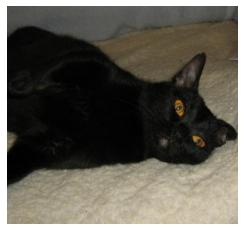

In [ ]:
pipe = Pipeline([f2,f3])
t = pipe(my_test_img)
ax = pipe.show(t)

In [ ]:
test_fig_exists(ax)

In [ ]:
#Check filtering is properly applied
add1 = B()
add1.split_idx = 1
# A just encodes int decodes Float
pipe = Pipeline([neg_tfm, A(), add1])
test_eq(pipe(start), -2)
pipe.split_idx=1
test_eq(pipe(start), -1)
pipe.split_idx=0
test_eq(pipe(start), -2)
for t in [None, 0, 1]:
    pipe.split_idx=t
    test_eq(pipe.decode(pipe(start)), start)
    test_stdout(lambda: pipe.show(pipe(start)), "-2.0")

In [ ]:
def neg(x): return -x
test_eq(type(mk_transform(neg)), Transform)
test_eq(type(mk_transform(math.sqrt)), Transform)
test_eq(type(mk_transform(lambda a:a*2)), Transform)
test_eq(type(mk_transform(Pipeline([neg]))), Pipeline)

### Methods

In [ ]:
#TODO: method examples

In [ ]:
show_doc(Pipeline.__call__)

<h4 id="Pipeline.__call__" class="doc_header"><code>Pipeline.__call__</code><a href="__main__.py#L25" class="source_link" style="float:right">[source]</a></h4>

> <code>Pipeline.__call__</code>(**`o`**)

Compose `__call__` of all `fs` on `o`

In [ ]:
show_doc(Pipeline.decode)

<h4 id="Pipeline.decode" class="doc_header"><code>Pipeline.decode</code><a href="__main__.py#L32" class="source_link" style="float:right">[source]</a></h4>

> <code>Pipeline.decode</code>(**`o`**, **`full`**=*`True`*)

Compose `decode` of all `fs` on `o`

In [ ]:
show_doc(Pipeline.setup)

<h4 id="Pipeline.setup" class="doc_header"><code>Pipeline.setup</code><a href="__main__.py#L16" class="source_link" style="float:right">[source]</a></h4>

> <code>Pipeline.setup</code>(**`items`**=*`None`*, **`train_setup`**=*`False`*)

Call each tfm's `setup` in order

During the setup, the `Pipeline` starts with no transform and adds them one at a time, so that during its setup, each transform gets the items processed up to its point and not after.

In [ ]:
#hide
#Test is with TfmdList

## Export -

In [ ]:
#hide
from nbdev.export import notebook2script
notebook2script()

Converted 00_test.ipynb.
Converted 01_foundation.ipynb.
Converted 02_utils.ipynb.
Converted 03_dispatch.ipynb.
Converted 04_transform.ipynb.
Converted index.ipynb.
